### Report: Ulwe Tel churn prediction

Imported all necessary libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interact

loaded the dataset in the dataframe

In [2]:
df = pd.read_csv(r'C:\Users\sivar\OneDrive\Desktop\Course\Machine learning\Lab\Dataset.csv')

preferred to work in duplicate dataframe

In [3]:
df1 = df

checking for null values

In [4]:
df1.isna().sum()

customer_id                           0
ownership                             0
activation_plan_code                  0
mnp_flag                              0
calls_incoming_cnt                    0
calls_outgoing_cnt                    0
calls_incoming_duration               0
calls_outgoing_duration               0
total_call_count                      0
total_sum_duration                    0
tot_usage_mb                          0
upload_usage_mb                       0
download_usage_mb                     0
days_since_latch                      0
cnt_open_qrc                          0
avg_days_to_close                    26
cnt_call_drops                        0
pcnt_dropped_calls                    0
rsrp_voice_pcnt_poor_duration         0
rsrp_data_pcnt_poor_duration          0
mean_cqi_voice_pcnt_poor_duration     0
sinr_voice_pcnt_poor_duration         0
sinr_data_pcnt_poor_duration          0
age_on_network                        0
cnt_connections                       0


removing the unncessary spaces in the feature names in the dataframe

In [5]:
df1.columns = df1.columns.str.strip()

It explicitly shows that having no cnt_open_qrc values have null values in avg_days_to_close. So filling the values with -1 as significant number for the avg_days_to_close feature where the cnt_open_qrc having null values. 

In [6]:
df1[df1['avg_days_to_close'].isna()]['cnt_open_qrc'].fillna(-1,inplace= True)
df1['avg_days_to_close'].fillna(-1,inplace= True)
df1[df1['avg_days_to_close'].isna()]

C:\Users\sivar\AppData\Local\Temp\ipykernel_20028\1036181910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1['avg_days_to_close'].isna()]['cnt_open_qrc'].fillna(-1,inplace= True)


Empty DataFrame
Columns: [customer_id, ownership, activation_plan_code, mnp_flag, calls_incoming_cnt, calls_outgoing_cnt, calls_incoming_duration, calls_outgoing_duration, total_call_count, total_sum_duration, tot_usage_mb, upload_usage_mb, download_usage_mb, days_since_latch, cnt_open_qrc, avg_days_to_close, cnt_call_drops, pcnt_dropped_calls, rsrp_voice_pcnt_poor_duration, rsrp_data_pcnt_poor_duration, mean_cqi_voice_pcnt_poor_duration, sinr_voice_pcnt_poor_duration, sinr_data_pcnt_poor_duration, age_on_network, cnt_connections, current_plan_code, cnt_recharges_made, total_payment_made, cnt_main_plans_taken, total_main_plans_mrp, cnt_addon_plans_taken, total_addon_plans_mrp, cnt_rchg_offline, cnt_rchg_online, cnt_rchg_on_or_before_expiry, cnt_rchg_after_expiry, current_active_plan_mrp, current_active_plan_validity, last_cycle_plan_mrp, last_cycle_plan_validity, avg_days_bw_rchg_and_expiry, stddev_days_bw_rchg_and_expiry, price_per_day, gb_per_day_quota, pcnt_quota_used, device_avg_asp, recharge_delay, churn]
Index: []

[0 rows x 48 columns]

Converting the categorical data into numerical

In [7]:
df_temp = pd.get_dummies(df['ownership'])
df_temp.head(5)

corporate  individual
0          0           1
1          0           1
2          0           1
3          0           1
4          0           1

joining the numerical data into the main data frame df1

In [8]:
df1=df1.join(df_temp)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        1000 non-null   int64  
 1   ownership                          1000 non-null   object 
 2   activation_plan_code               1000 non-null   int64  
 3   mnp_flag                           1000 non-null   int64  
 4   calls_incoming_cnt                 1000 non-null   float64
 5   calls_outgoing_cnt                 1000 non-null   float64
 6   calls_incoming_duration            1000 non-null   float64
 7   calls_outgoing_duration            1000 non-null   float64
 8   total_call_count                   1000 non-null   float64
 9   total_sum_duration                 1000 non-null   float64
 10  tot_usage_mb                       1000 non-null   float64
 11  upload_usage_mb                    1000 non-null   float6

Once joined removing the categorical data

In [10]:
df1=df1.drop(["ownership"], axis = 1)


In [11]:
df_temp = pd.get_dummies(df['device_avg_asp'])

In [12]:
df1=df1.join(df_temp)

In [13]:
df1=df1.drop(["device_avg_asp"], axis = 1)

In [14]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [15]:
df1.head()

customer_id  activation_plan_code  mnp_flag  calls_incoming_cnt  \
0        10000                     4         0                31.0   
1        10001                     6         0                 8.0   
2        10002                     8         1                13.0   
3        10003                     7         0                20.0   
4        10004                     3         1                22.0   

   calls_outgoing_cnt  calls_incoming_duration  calls_outgoing_duration  \
0               333.0                31.980873               548.719449   
1                42.0                 9.577651                43.988952   
2                 0.0                15.368591                 0.000000   
3                38.0                21.091508                52.044282   
4                29.0                25.592874                41.290402   

   total_call_count  total_sum_duration  tot_usage_mb  upload_usage_mb  \
0             364.0          580.700321   3163.351573       218.669764   
1              50.0           53.566603   3672.746526      1406.966020   
2              13.0           15.368591   4712.106937      1218.473756   
3              58.0           73.135790  11356.222392      1327.000054   
4              51.0           66.883276  11302.446568        84.280664   

   download_usage_mb  days_since_latch  cnt_open_qrc  avg_days_to_close  \
0        2944.681809                14             5               12.0   
1        2265.780505                 2             5                8.0   
2        3493.633182                 1             3               13.0   
3       10029.222338                 2             7                6.0   
4       11218.165904                 2             7                8.0   

   cnt_call_drops  pcnt_dropped_calls  rsrp_voice_pcnt_poor_duration  \
0       15.850024            4.354402                      17.953422   
1        2.041106            4.082213                      50.417468   
2        0.527123            4.054789                      69.855933   
3        2.366328            4.079876                      37.472380   
4        1.307365            2.563461                      65.076399   

   rsrp_data_pcnt_poor_duration  mean_cqi_voice_pcnt_poor_duration  \
0                     19.367968                          91.668110   
1                     56.131160                          41.213461   
2                     84.210546                          58.969216   
3                     45.964767                          69.585481   
4                     65.635028                          76.365055   

   sinr_voice_pcnt_poor_duration  sinr_data_pcnt_poor_duration  \
0                      23.558871                     26.801912   
1                      13.093980                     15.351267   
2                      98.521221                     99.934127   
3                      22.996520                     27.170476   
4                      88.513859                     96.226030   

   age_on_network  cnt_connections  current_plan_code  cnt_recharges_made  \
0            1081                6                  4                 118   
1            1243                6                  9                 134   
2             595                3                  4                  68   
3             732                7                  4                  82   
4             398                7                 10                  48   

   total_payment_made  cnt_main_plans_taken  total_main_plans_mrp  \
0        11616.546516                    53           5217.601401   
1        12063.660870                    99           8912.704672   
2           53.104257                    47             36.704413   
3        11613.017620                    16           2265.954658   
4          385.772823                    18            144.664809   

   cnt_addon_plans_taken  total_addon_plans_mrp  cnt_rchg_offline  \
0                     65            6

Plotting the correlation matrix for the dataframe features

In [16]:
correlation_matrix = df1.corr()
sns.set(font_scale=8.4)
plt.figure(figsize=(120,120))
sns.heatmap(correlation_matrix, annot=False)
plt.show()

To check which feature is good to select, plotted here the box plot. Main focus is to select the biased from features with respect to the median

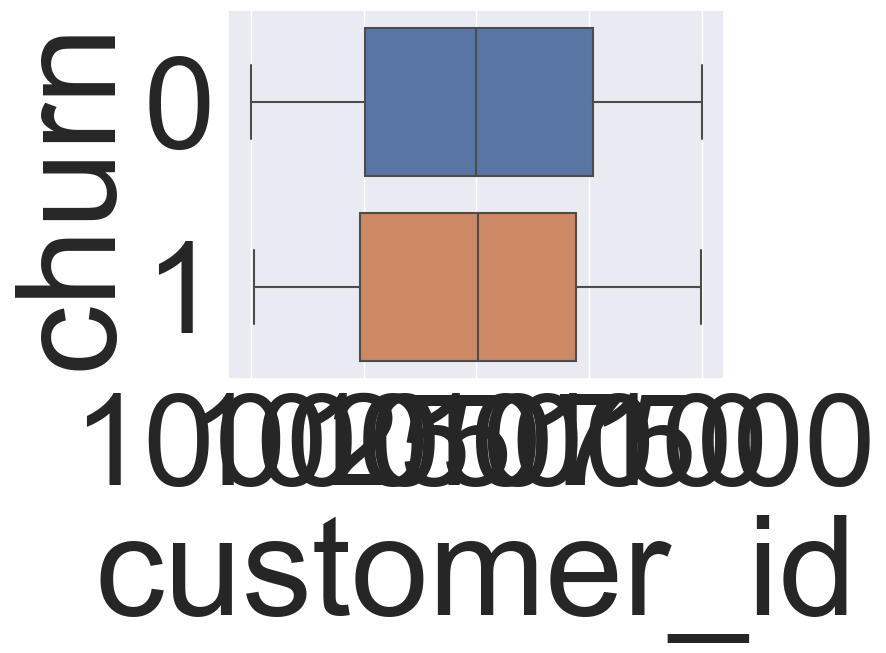

<Figure size 12000x12000 with 0 Axes>

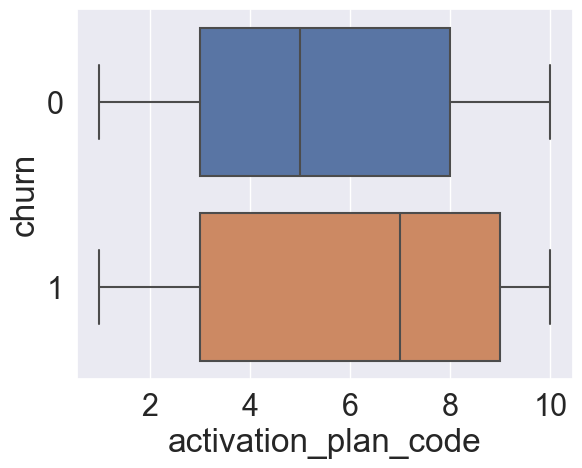

<Figure size 12000x12000 with 0 Axes>

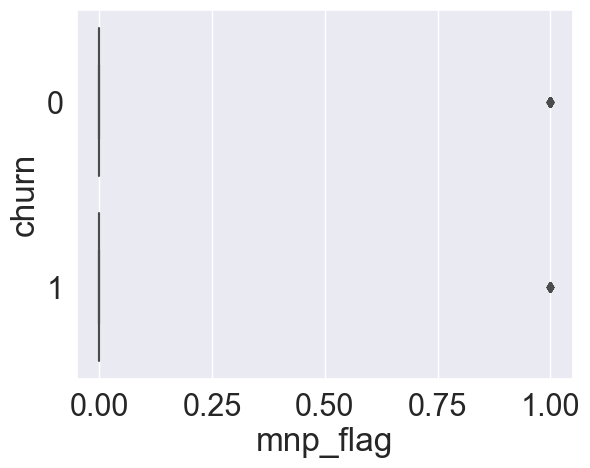

<Figure size 12000x12000 with 0 Axes>

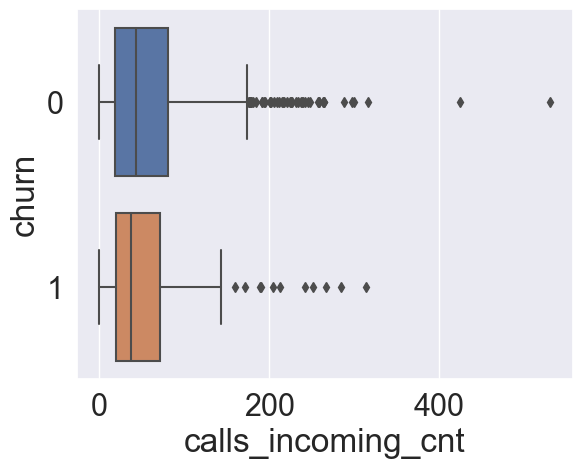

<Figure size 12000x12000 with 0 Axes>

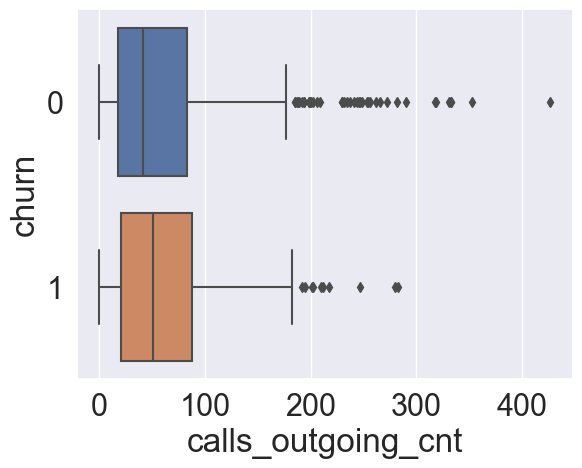

<Figure size 12000x12000 with 0 Axes>

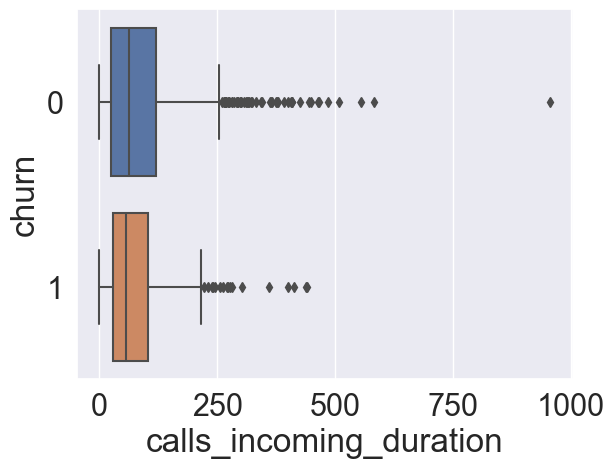

<Figure size 12000x12000 with 0 Axes>

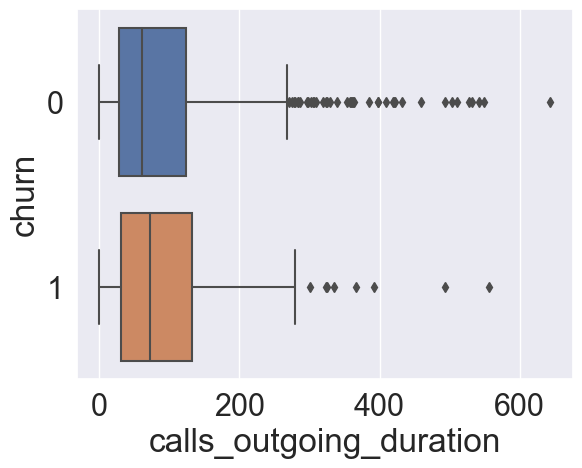

<Figure size 12000x12000 with 0 Axes>

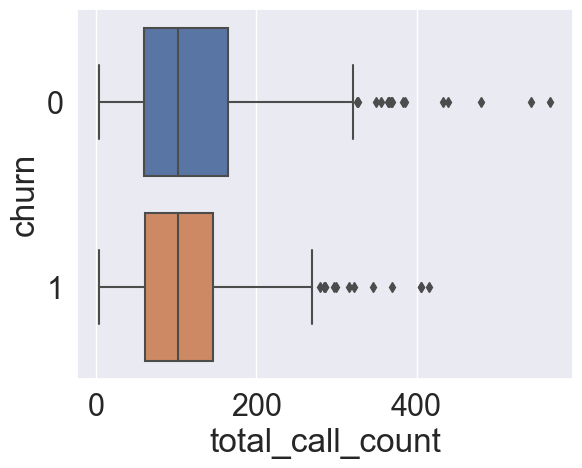

<Figure size 12000x12000 with 0 Axes>

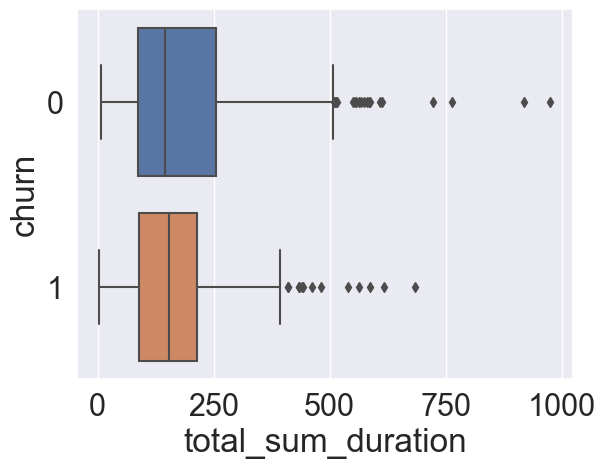

<Figure size 12000x12000 with 0 Axes>

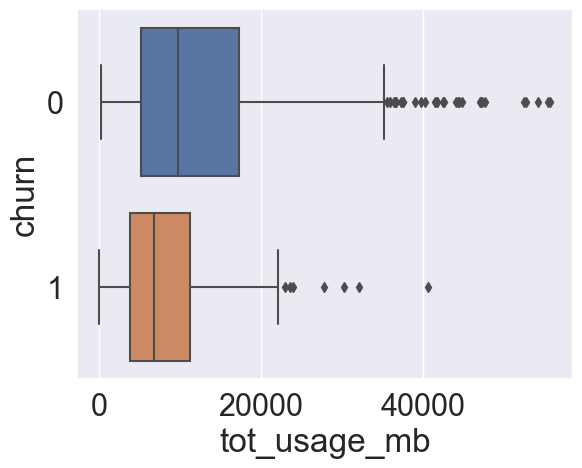

<Figure size 12000x12000 with 0 Axes>

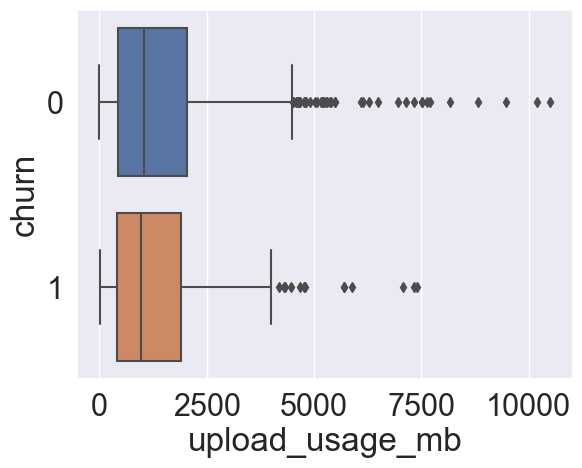

<Figure size 12000x12000 with 0 Axes>

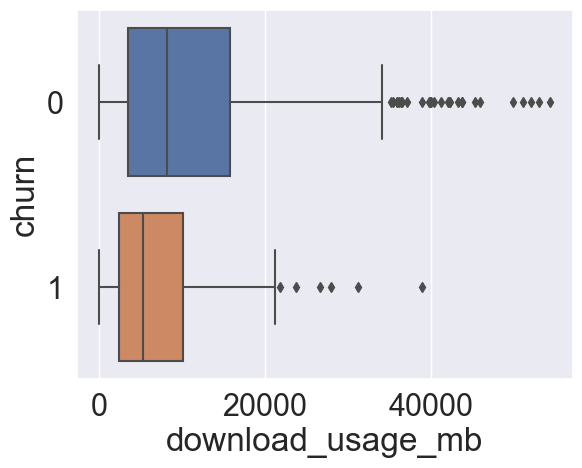

<Figure size 12000x12000 with 0 Axes>

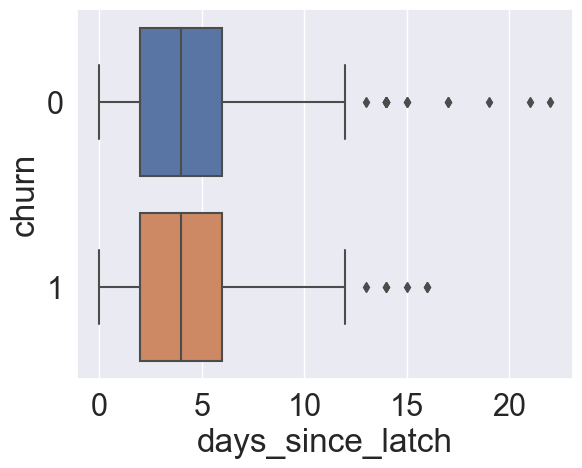

<Figure size 12000x12000 with 0 Axes>

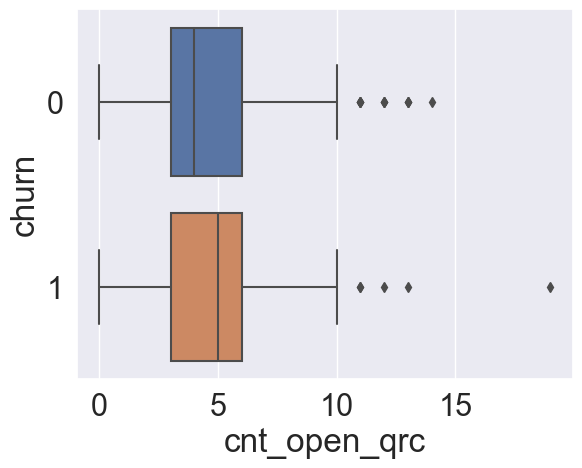

<Figure size 12000x12000 with 0 Axes>

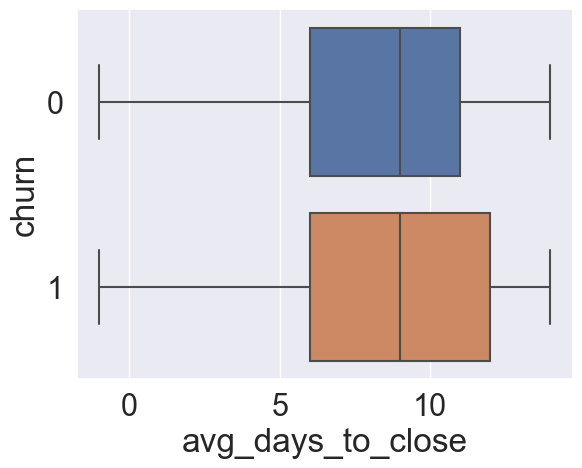

<Figure size 12000x12000 with 0 Axes>

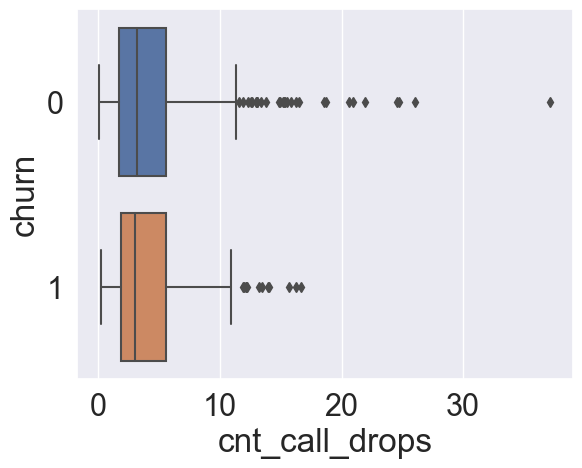

<Figure size 12000x12000 with 0 Axes>

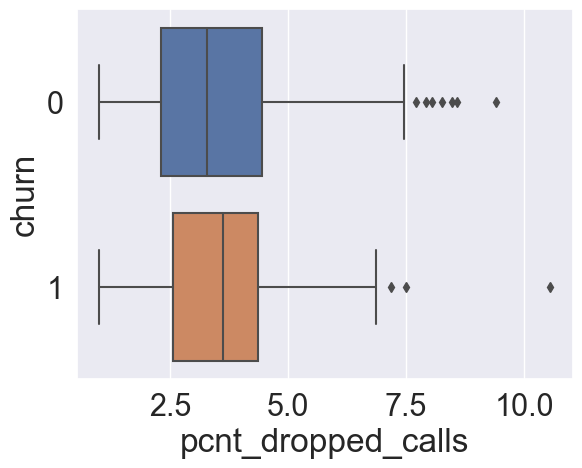

<Figure size 12000x12000 with 0 Axes>

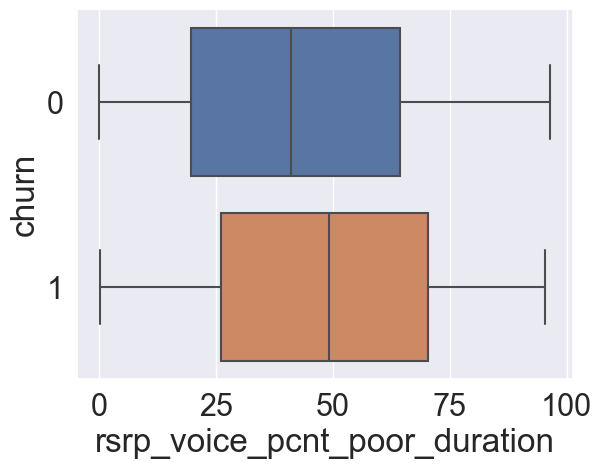

<Figure size 12000x12000 with 0 Axes>

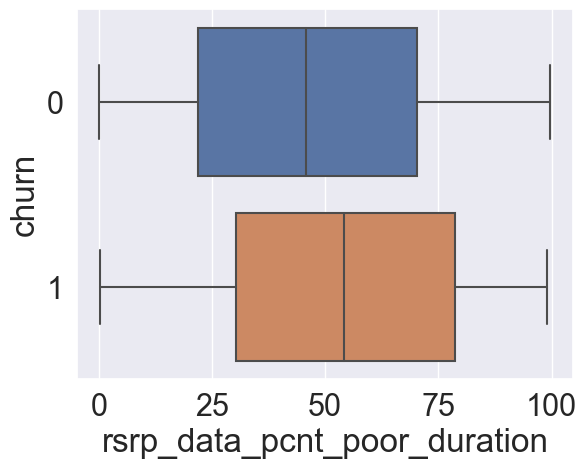

<Figure size 12000x12000 with 0 Axes>

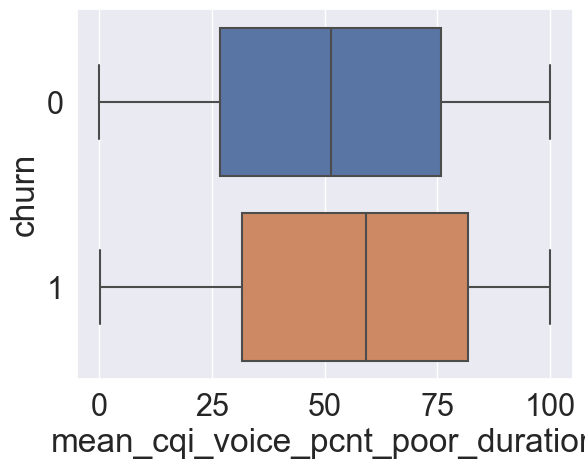

<Figure size 12000x12000 with 0 Axes>

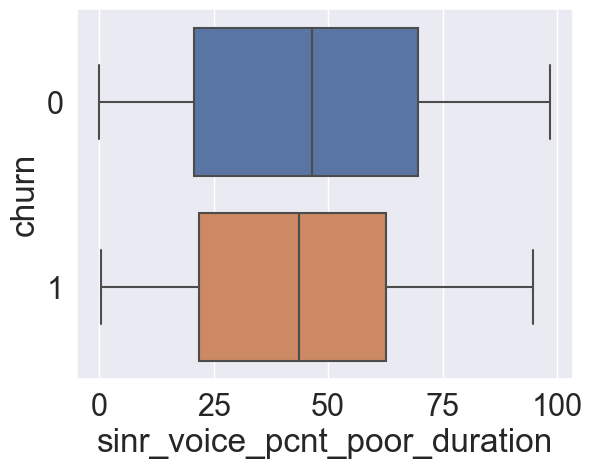

<Figure size 12000x12000 with 0 Axes>

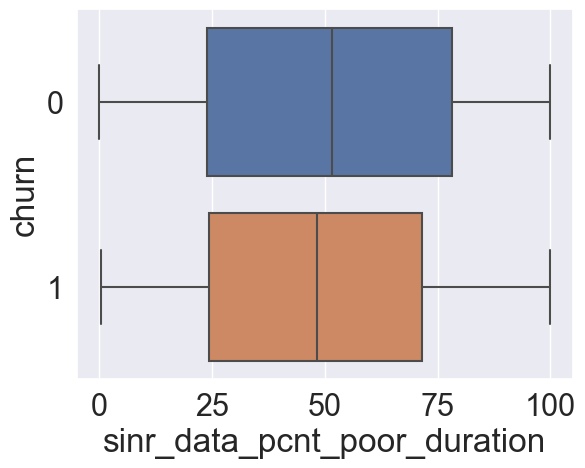

<Figure size 12000x12000 with 0 Axes>

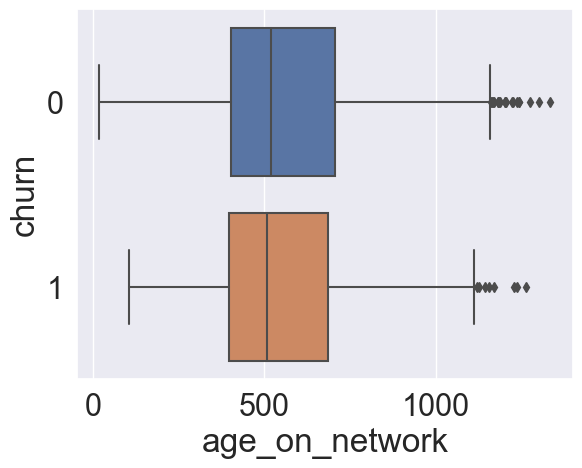

<Figure size 12000x12000 with 0 Axes>

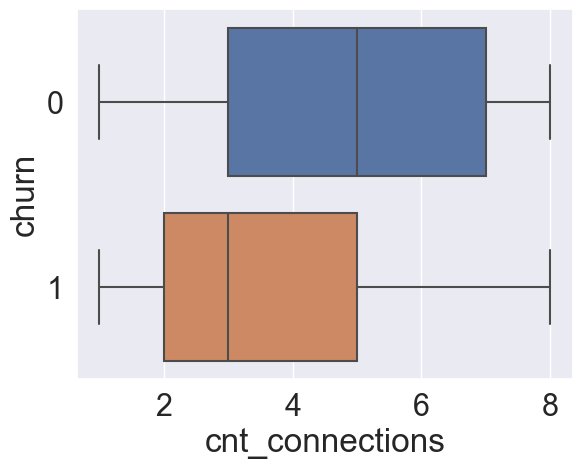

<Figure size 12000x12000 with 0 Axes>

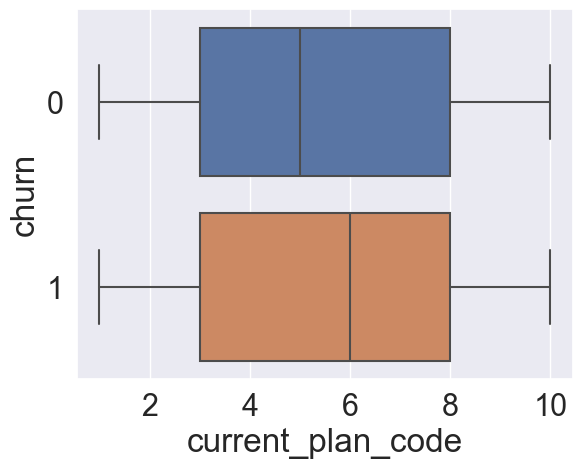

<Figure size 12000x12000 with 0 Axes>

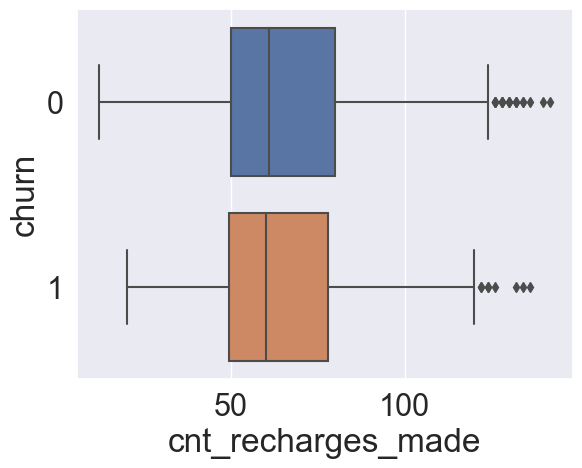

<Figure size 12000x12000 with 0 Axes>

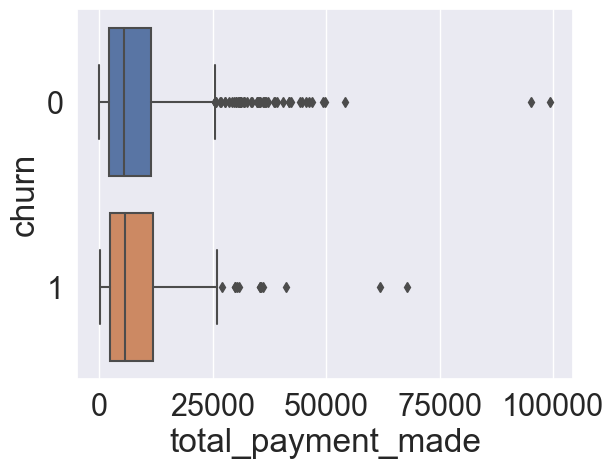

<Figure size 12000x12000 with 0 Axes>

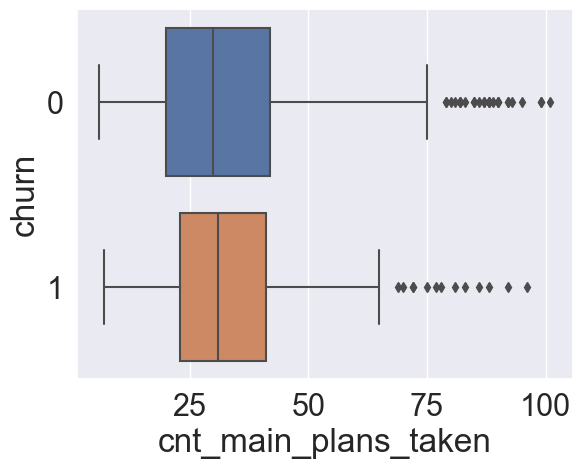

<Figure size 12000x12000 with 0 Axes>

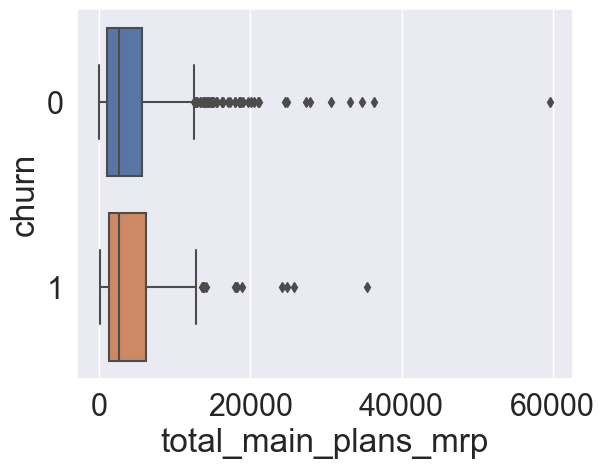

<Figure size 12000x12000 with 0 Axes>

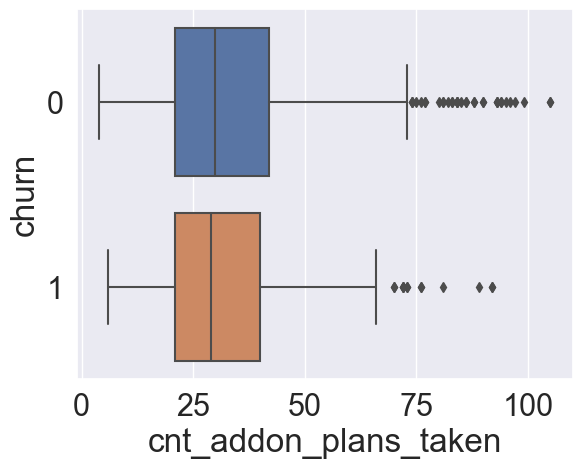

<Figure size 12000x12000 with 0 Axes>

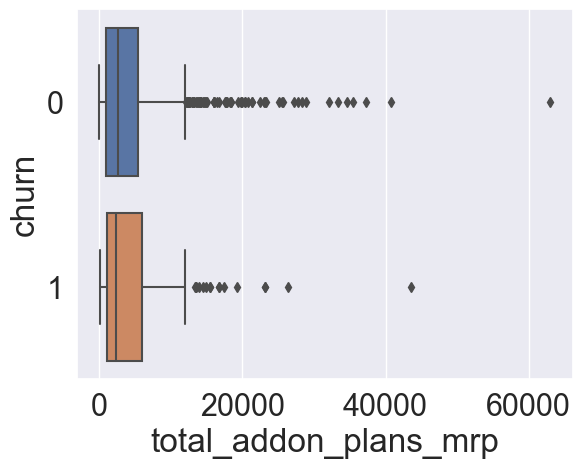

<Figure size 12000x12000 with 0 Axes>

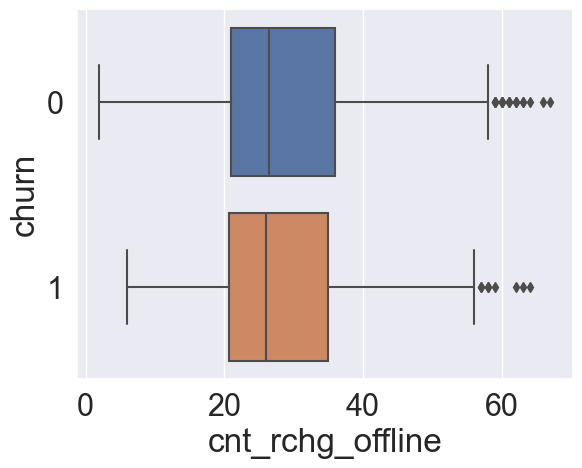

<Figure size 12000x12000 with 0 Axes>

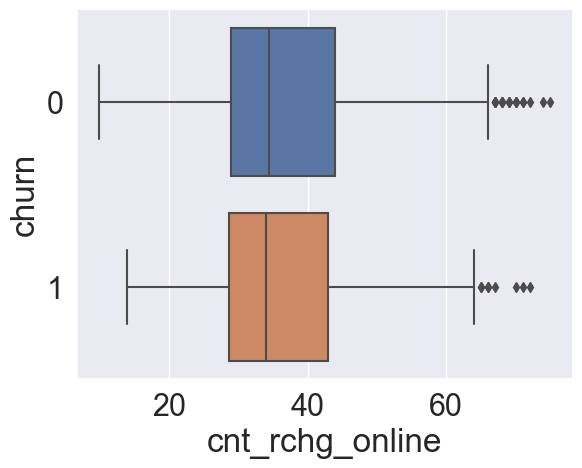

<Figure size 12000x12000 with 0 Axes>

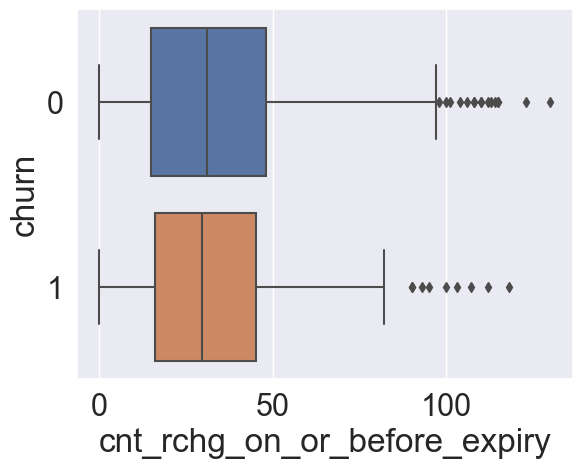

<Figure size 12000x12000 with 0 Axes>

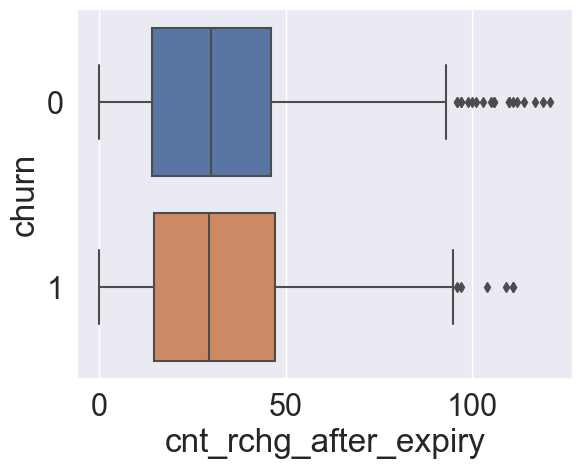

<Figure size 12000x12000 with 0 Axes>

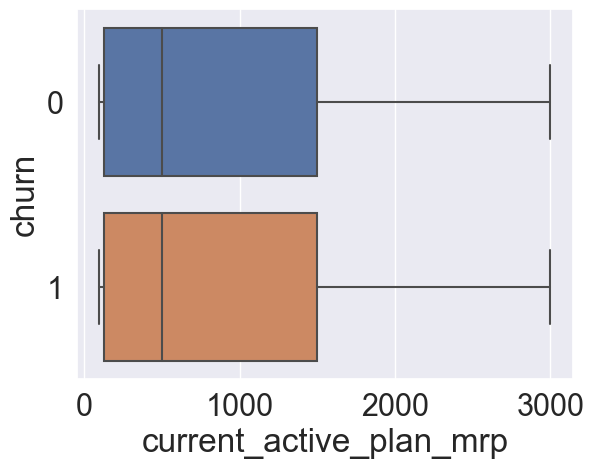

<Figure size 12000x12000 with 0 Axes>

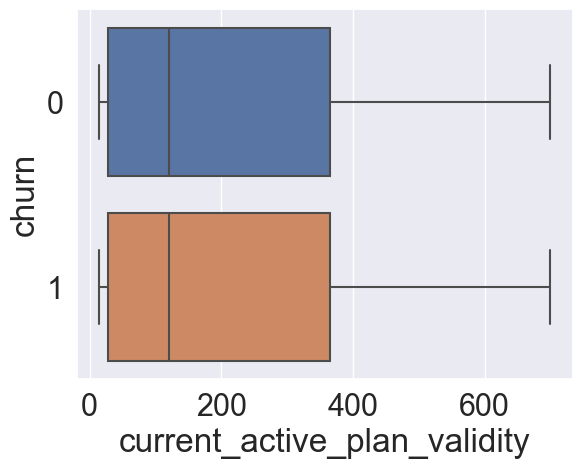

<Figure size 12000x12000 with 0 Axes>

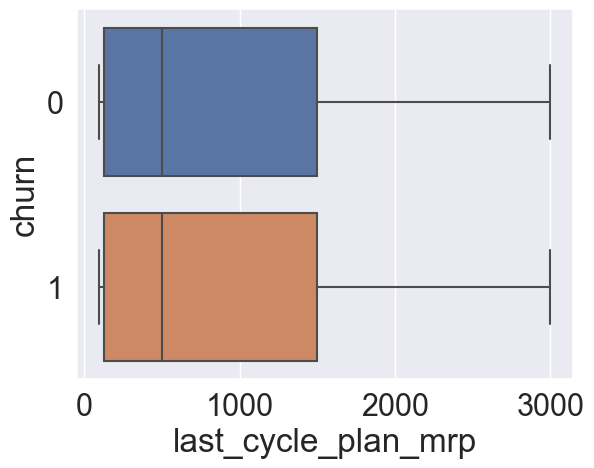

<Figure size 12000x12000 with 0 Axes>

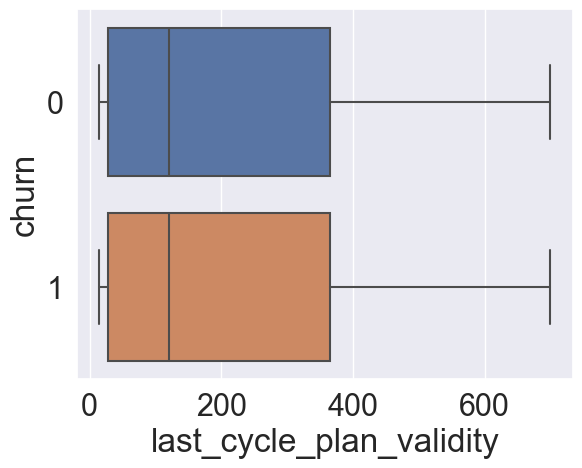

<Figure size 12000x12000 with 0 Axes>

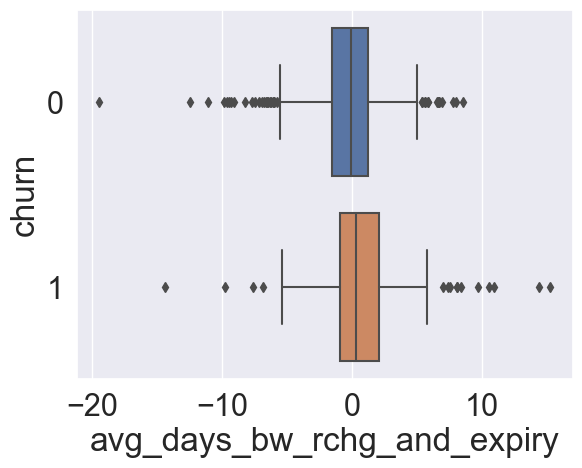

<Figure size 12000x12000 with 0 Axes>

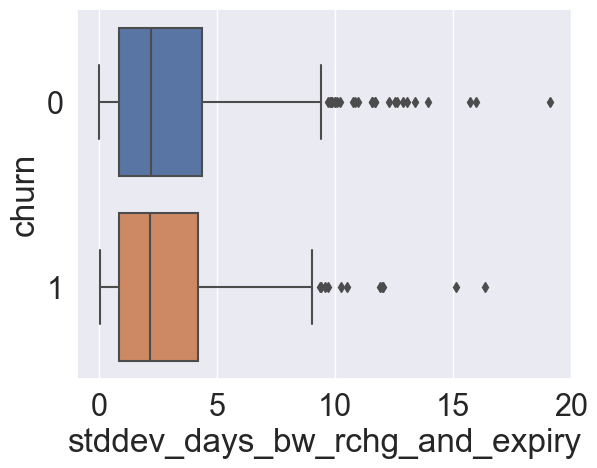

<Figure size 12000x12000 with 0 Axes>

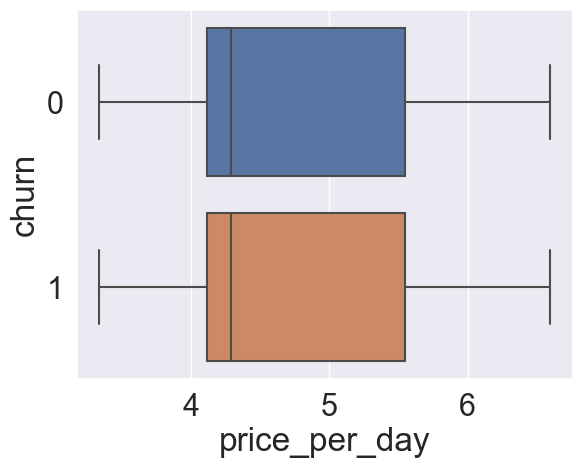

<Figure size 12000x12000 with 0 Axes>

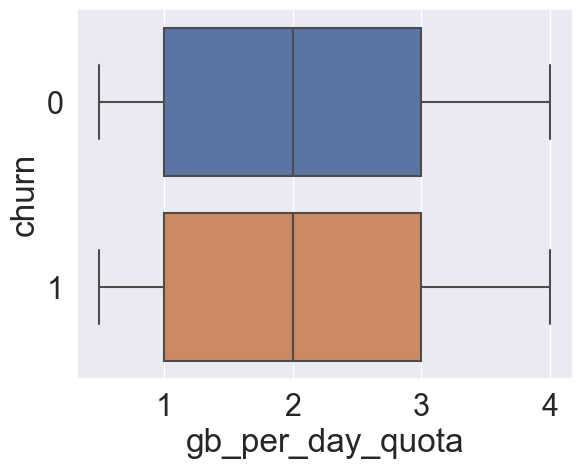

<Figure size 12000x12000 with 0 Axes>

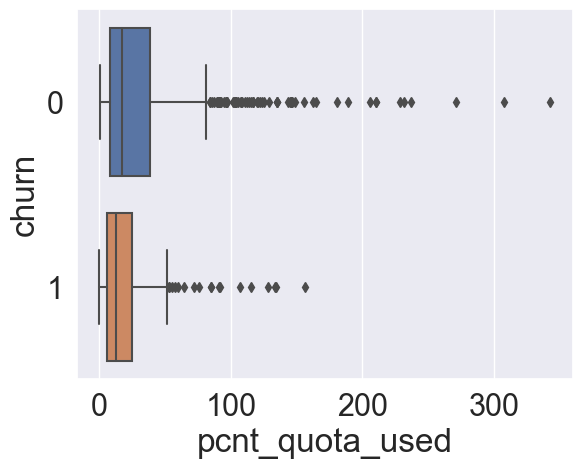

<Figure size 12000x12000 with 0 Axes>

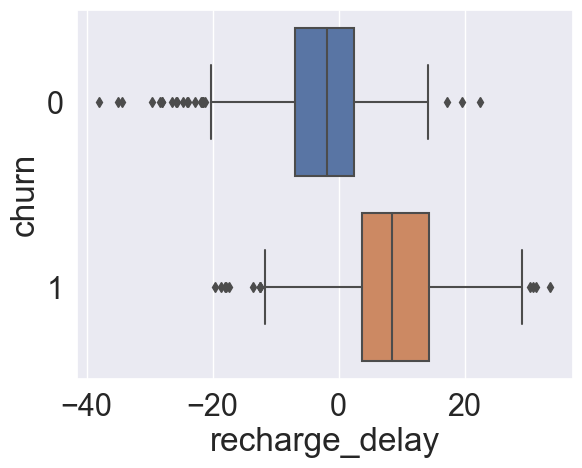

<Figure size 12000x12000 with 0 Axes>

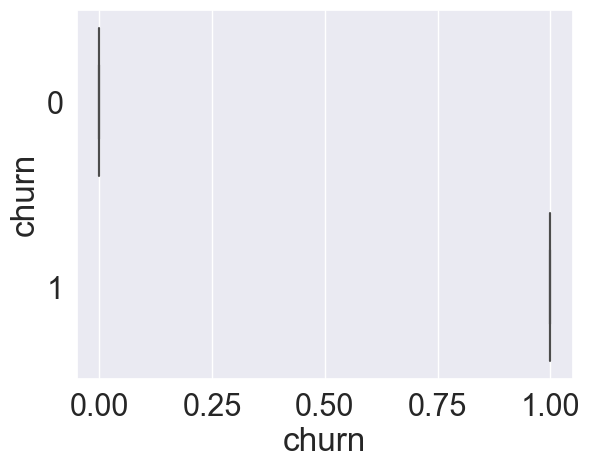

<Figure size 12000x12000 with 0 Axes>

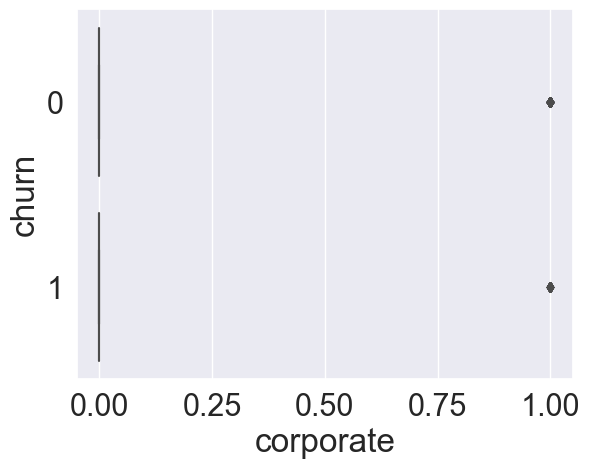

<Figure size 12000x12000 with 0 Axes>

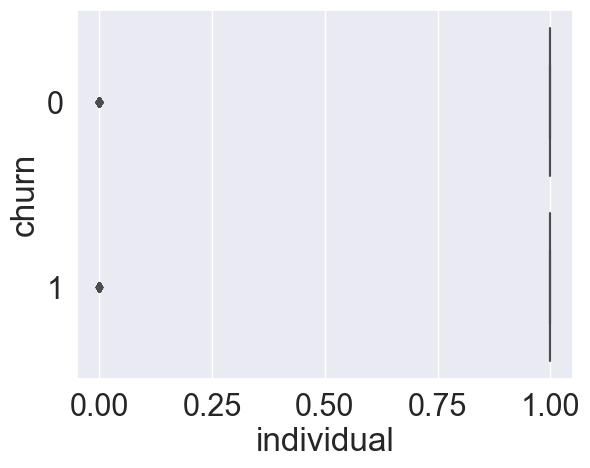

<Figure size 12000x12000 with 0 Axes>

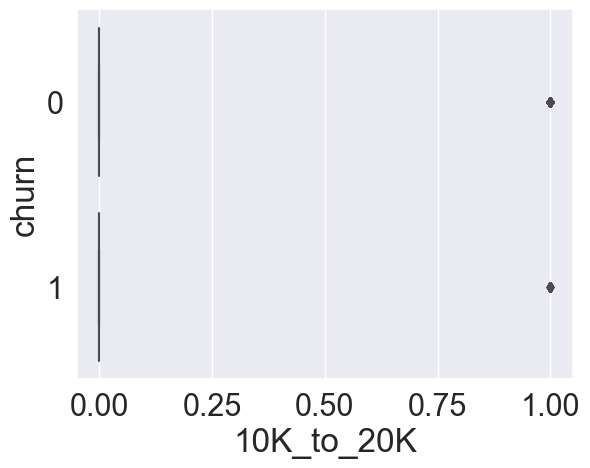

<Figure size 12000x12000 with 0 Axes>

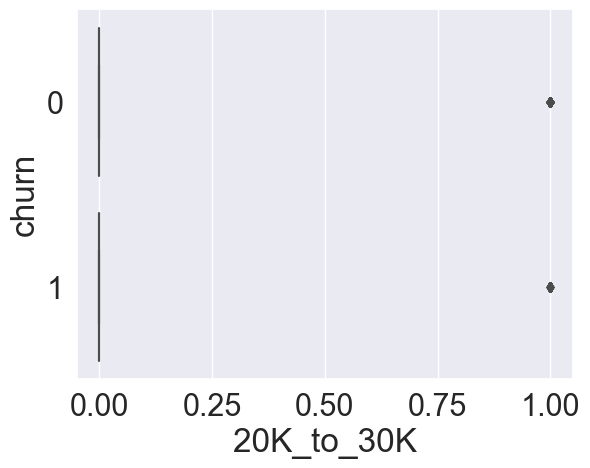

<Figure size 12000x12000 with 0 Axes>

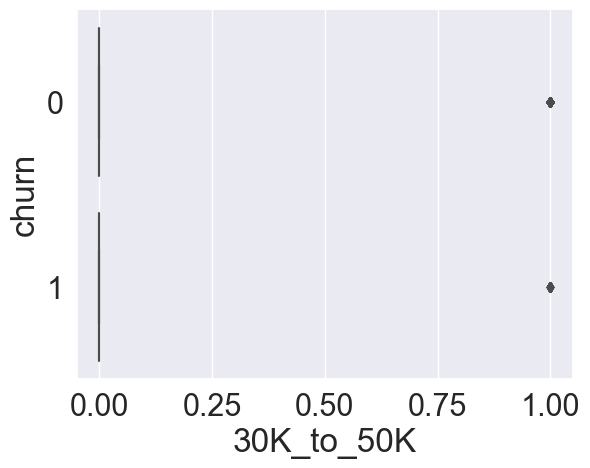

<Figure size 12000x12000 with 0 Axes>

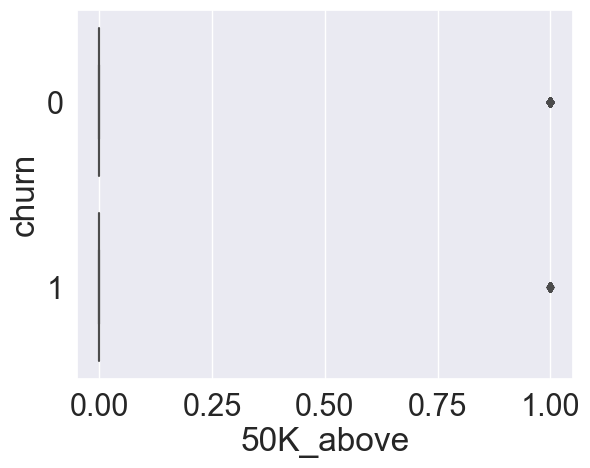

<Figure size 12000x12000 with 0 Axes>

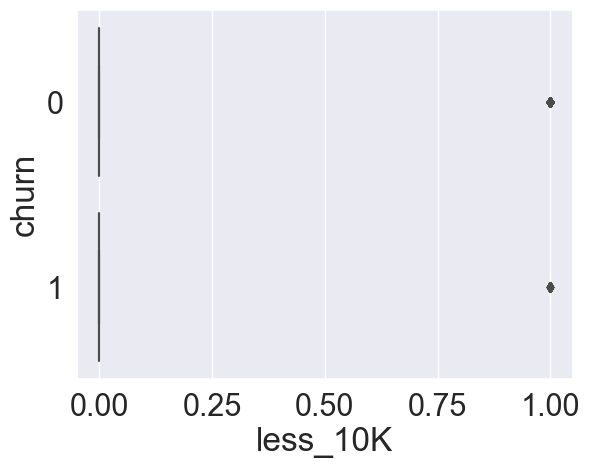

<Figure size 12000x12000 with 0 Axes>

In [17]:
for features in df1:
    sns.boxplot(y = df1['churn'].astype('category'), x = features, data=df1)
    sns.set(font_scale=2)
    plt.figure(figsize=(120,120))
    plt.show()

To check the distribution of the each whether plotted the histogram

array([[<AxesSubplot: title={'center': 'customer_id'}>,
        <AxesSubplot: title={'center': 'activation_plan_code'}>,
        <AxesSubplot: title={'center': 'mnp_flag'}>,
        <AxesSubplot: title={'center': 'calls_incoming_cnt'}>,
        <AxesSubplot: title={'center': 'calls_outgoing_cnt'}>,
        <AxesSubplot: title={'center': 'calls_incoming_duration'}>,
        <AxesSubplot: title={'center': 'calls_outgoing_duration'}>],
       [<AxesSubplot: title={'center': 'total_call_count'}>,
        <AxesSubplot: title={'center': 'total_sum_duration'}>,
        <AxesSubplot: title={'center': 'tot_usage_mb'}>,
        <AxesSubplot: title={'center': 'upload_usage_mb'}>,
        <AxesSubplot: title={'center': 'download_usage_mb'}>,
        <AxesSubplot: title={'center': 'days_since_latch'}>,
        <AxesSubplot: title={'center': 'cnt_open_qrc'}>],
       [<AxesSubplot: title={'center': 'avg_days_to_close'}>,
        <AxesSubplot: title={'center': 'cnt_call_drops'}>,
        <AxesSubplot

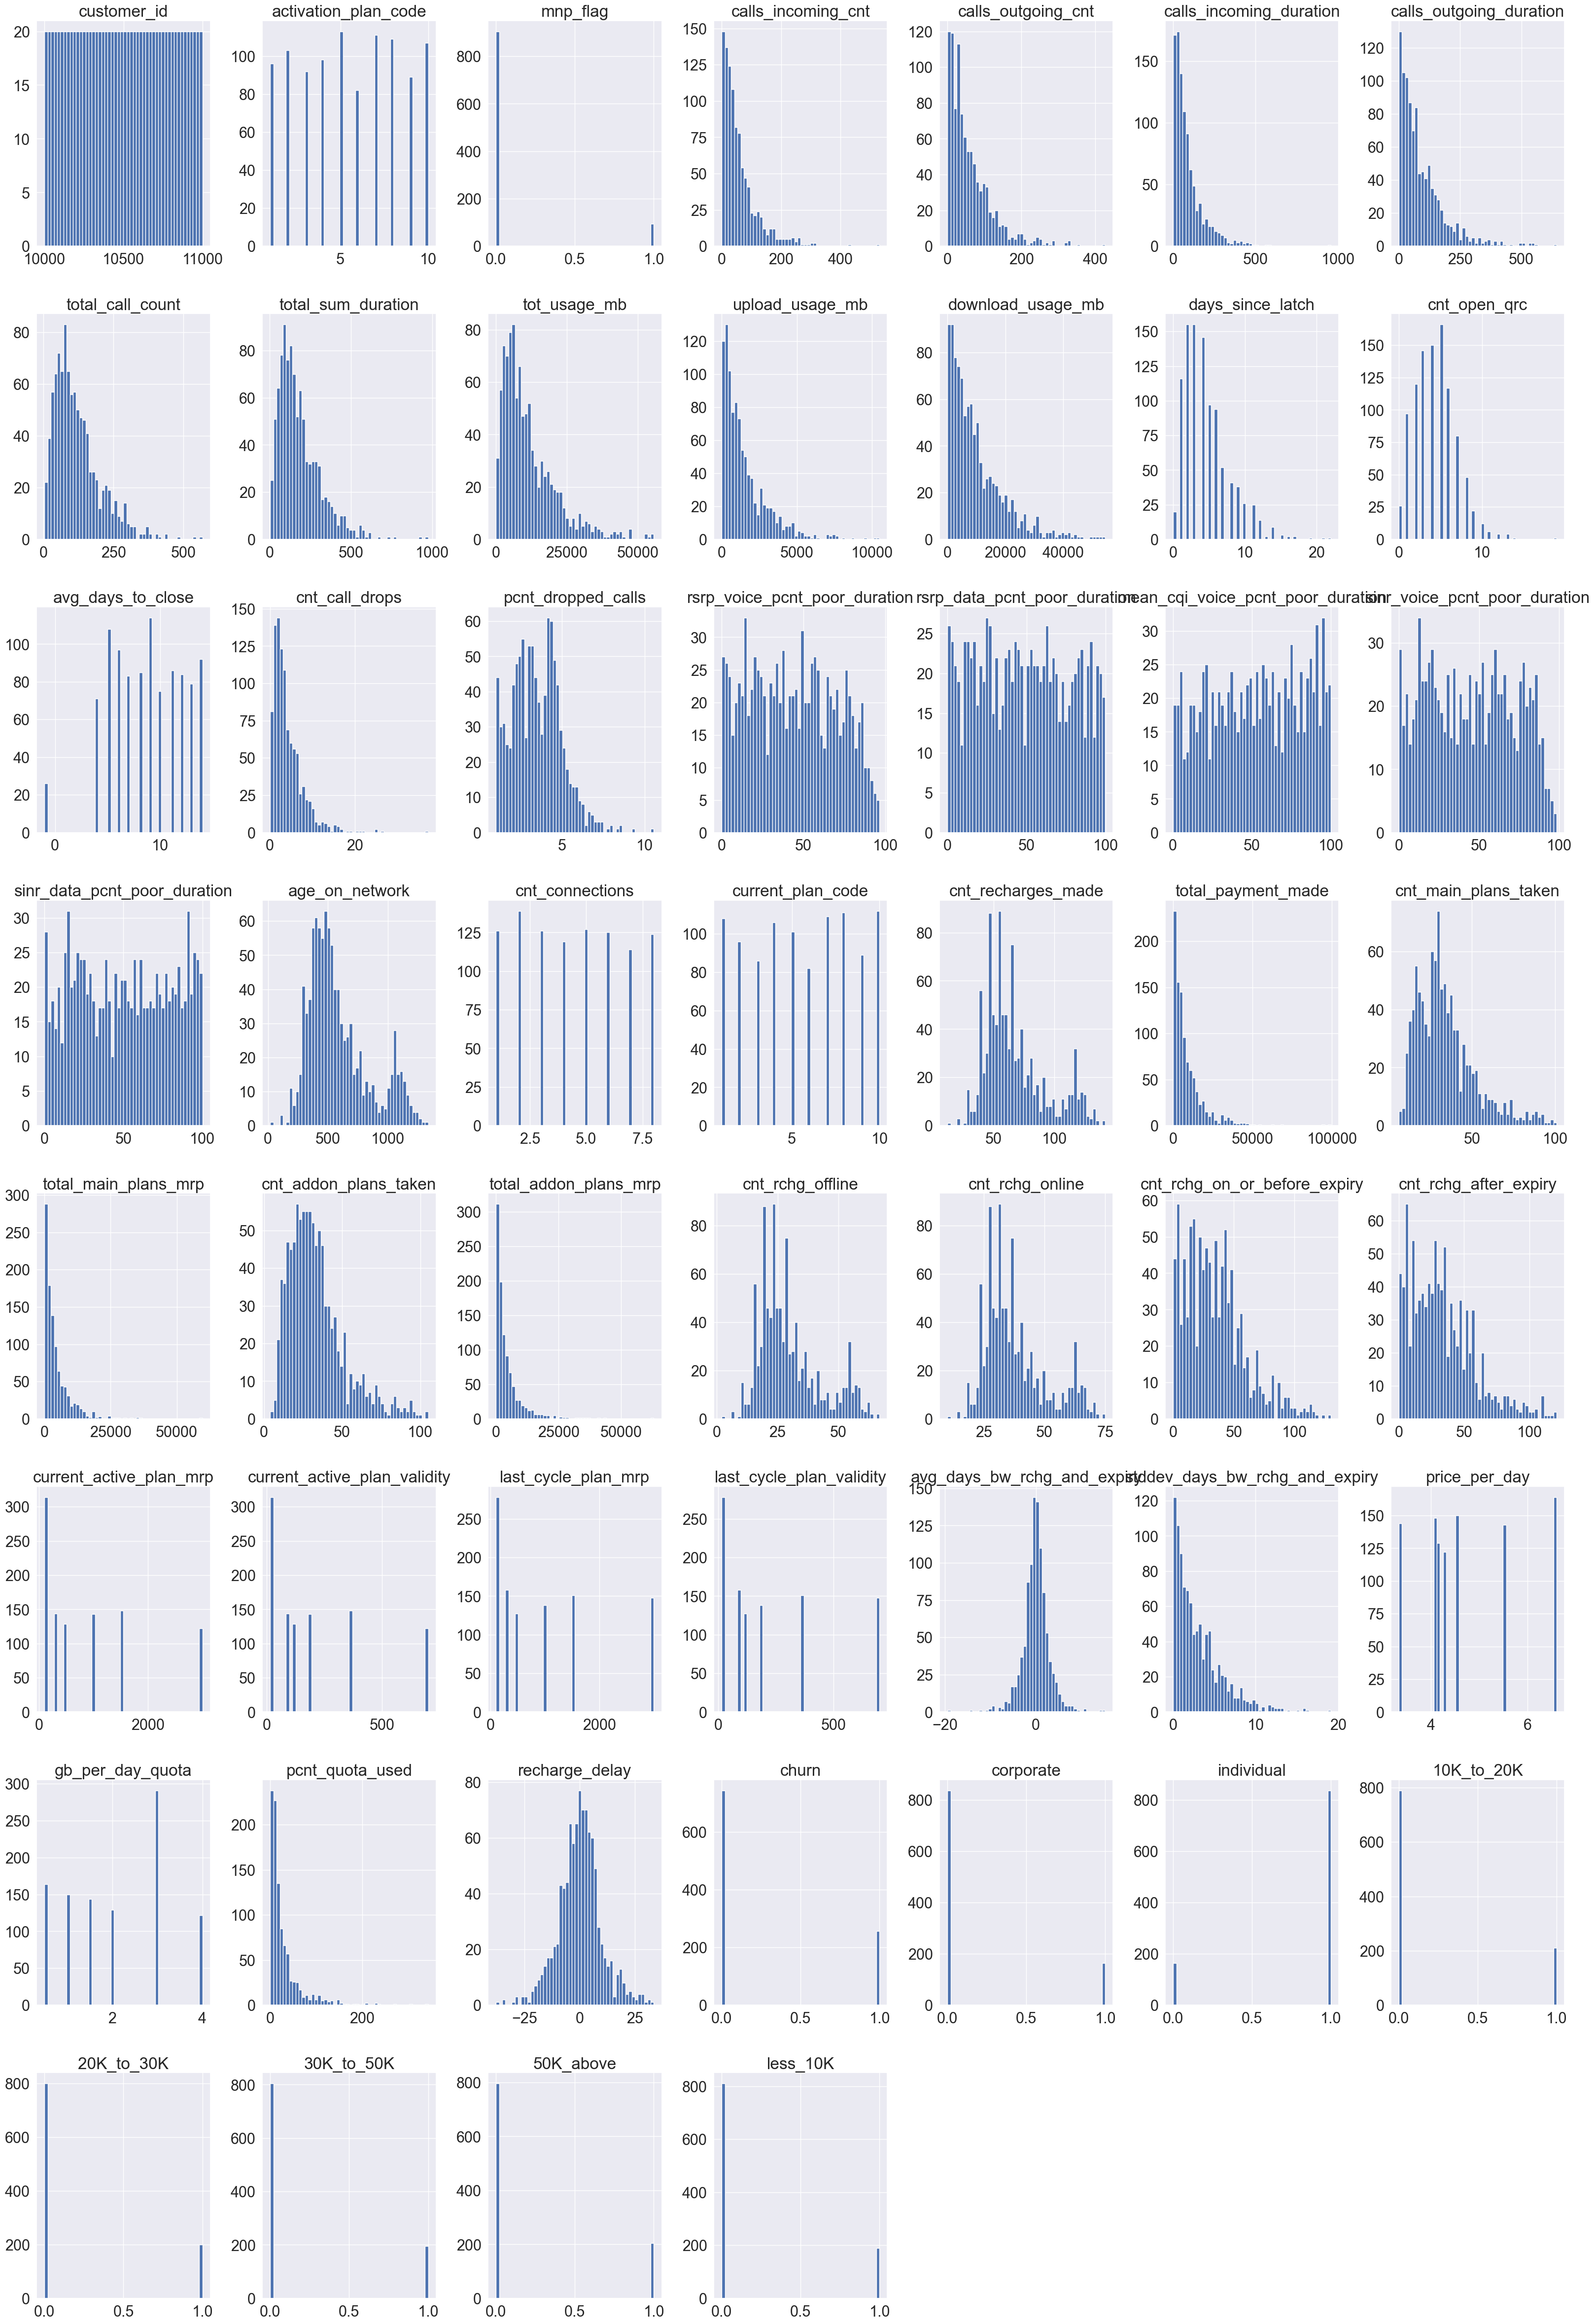

In [18]:
df1.hist(bins=50, figsize=(40, 60))

Correlation is checked with respect to the all features

In [19]:
df1.corr()

customer_id  activation_plan_code  \
customer_id                           1.000000              0.052418   
activation_plan_code                  0.052418              1.000000   
mnp_flag                             -0.022252             -0.013031   
calls_incoming_cnt                    0.019348              0.011042   
calls_outgoing_cnt                    0.032568              0.042704   
calls_incoming_duration               0.012312              0.019123   
calls_outgoing_duration               0.041008              0.042834   
total_call_count                      0.037623              0.038905   
total_sum_duration                    0.038585              0.044881   
tot_usage_mb                          0.011171             -0.004974   
upload_usage_mb                      -0.049306             -0.033514   
download_usage_mb                     0.019277              0.000361   
days_since_latch                      0.040040              0.039919   
cnt_open_qrc                          0.025472              0.011120   
avg_days_to_close                    -0.019550             -0.036187   
cnt_call_drops                        0.048299              0.031177   
pcnt_dropped_calls                    0.029840             -0.004628   
rsrp_voice_pcnt_poor_duration         0.088297              0.048468   
rsrp_data_pcnt_poor_duration          0.082391              0.051820   
mean_cqi_voice_pcnt_poor_duration    -0.033020              0.017128   
sinr_voice_pcnt_poor_duration         0.071778             -0.021508   
sinr_data_pcnt_poor_duration          0.072044             -0.023007   
age_on_network                       -0.025426             -0.010357   
cnt_connections                      -0.054758             -0.024122   
current_plan_code                    -0.013335              0.051528   
cnt_recharges_made                   -0.025842             -0.010539   
total_payment_made                   -0.048365              0.017207   
cnt_main_plans_taken                 -0.021455             -0.005301   
total_main_plans_mrp                 -0.052659              0.005707   
cnt_addon_plans_taken                -0.015335             -0.009651   
total_addon_plans_mrp                -0.036875              0.024814   
cnt_rchg_offline                     -0.025842             -0.010539   
cnt_rchg_online                      -0.025842             -0.010539   
cnt_rchg_on_or_before_expiry          0.000142             -0.034484   
cnt_rchg_after_expiry                -0.027149              0.023885   
current_active_plan_mrp               0.013351             -0.011095   
current_active_plan_validity          0.010897             -0.015075   
last_cycle_plan_mrp                  -0.022777              0.009111   
last_cycle_plan_validity             -0.017633              0.005211   
avg_days_bw_rchg_and_expiry          -0.001610             -0.033716   
stddev_days_bw_rchg_and_expiry       -0.004880              0.023346   
price_per_day                         0.005711             -0.005425   
gb_per_day_quota                      0.013736             -0.000649   
pcnt_quota_used                      -0.000417             -0.028850   
recharge_delay                        0.001770              0.182931   
churn                                -0.016359              0.112554   
corporate                             0.065720              0.015886   
individual                           -0.065720             -0.015886   
10K_to_20K                           -0.000468             -0.055497   
20K_to_30K                            0.014722              0.050178   
30K_to_50K                            0.033492             -0.033542   
50K_above                            -0.021483              0.034080   
less_10K                             -0.026349              0.005392   

                                       mnp_flag  calls_incoming_cnt  \
customer_id                       -2.225207e-02            0.019348   
acti

On analysis of the above visuization below features are selected

In [20]:
df2 = df1[['churn','activation_plan_code','cnt_open_qrc','rsrp_data_pcnt_poor_duration','sinr_voice_pcnt_poor_duration','sinr_data_pcnt_poor_duration','cnt_connections','current_plan_code']]

In [21]:
features=df2.columns.tolist()[1:]
features

['activation_plan_code',
 'cnt_open_qrc',
 'rsrp_data_pcnt_poor_duration',
 'sinr_voice_pcnt_poor_duration',
 'sinr_data_pcnt_poor_duration',
 'cnt_connections',
 'current_plan_code']

In [22]:
df2.head()

churn  activation_plan_code  cnt_open_qrc  rsrp_data_pcnt_poor_duration  \
0      0                     4             5                     19.367968   
1      0                     6             5                     56.131160   
2      0                     8             3                     84.210546   
3      0                     7             7                     45.964767   
4      0                     3             7                     65.635028   

   sinr_voice_pcnt_poor_duration  sinr_data_pcnt_poor_duration  \
0                      23.558871                     26.801912   
1                      13.093980                     15.351267   
2                      98.521221                     99.934127   
3                      22.996520                     27.170476   
4                      88.513859                     96.226030   

   cnt_connections  current_plan_code  
0                6                  4  
1                6                  9  
2                3                  4  
3                7                  4  
4                7                 10

Features are assigned as per the target prediction of churn

In [23]:
X=df2[features]

In [24]:
y=df2['churn']

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

Standardize the features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Function for splitting the traning and testing set with 80:20 ratio with andom_state 100

In [27]:
from sklearn.model_selection import train_test_split 
def split_train_test(df2):
    
    X = df2.drop(['churn'], axis=1)
    # Putting target variable to y
    y = df2['churn']
    # Splitting data into train and test set 80:20
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
    return (X_train, X_test, y_train, y_test)

In [29]:
X_train, X_test, y_train, y_test = split_train_test(df2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Performing Linear Discriminant Analysis. As here the class is 0 and 1 for churning n_component is 1 here (n_classes - 1)

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
def ldamo(X_train, X_test, y_train, n_components=None):
    lda = LDA(n_components=1)
    lda = lda.fit(X_train, y_train)
    X_train_lda = lda.transform(X_train)
    X_test_lda = lda.transform(X_test)
    y_train_pred = lda.predict(X_train)
    y_test_pred = lda.predict(X_test)
    return (lda, X_train_lda, X_test_lda, y_train_pred,y_test_pred)

In [31]:
lda, X_train_lda, X_test_lda, y_train_pred, y_test_pred = ldamo(X_train, X_test, y_train, n_components=1)

In [32]:
print('Explained variance ratio (first two components): %s'% str(lda.explained_variance_ratio_))

Explained variance ratio (first two components): [1.]


In [33]:
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(y_train,y_train_pred)*100)
print('Test accuracy:', accuracy_score(y_test,y_test_pred)*100)

Train accuracy: 76.0
Test accuracy: 74.5


In [34]:
from sklearn.metrics import confusion_matrix
print('Train Confusion matrix:\n',confusion_matrix(y_train, y_train_pred))
print('Test Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))

Train Confusion matrix:
 [[590  10]
 [182  18]]
Test Confusion matrix:
 [[142   2]
 [ 49   7]]


Applying the XGBoost model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [36]:
def Model_XGBoost (X_train_lda, X_test_lda, y_train, y_test):
  # Instantiate the XGBClassifier: xg_cl
  xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

  # Fit the classifier to the training set
  xg_cl.fit(X_train_lda, y_train)

  # Predict the labels of the test set: preds
  preds = xg_cl.predict(X_test_lda)
  result = confusion_matrix(y_test, preds)
  print("Confusion Matrix:")
  print(result)
  # Compute the accuracy: accuracy
  accuracy = accuracy_score(y_test, preds)
  print("Accuracy: %f" % ((accuracy)*100))
  print("Classification Report:")
  # Print the confusion matrix
  print(classification_report(y_test, preds))

  return xg_cl, y_train, y_test, preds

Report XGBoost with LDA

In [37]:
Report_XG_LDA = Model_XGBoost(X_train_lda, X_test_lda, y_train, y_test)

Confusion Matrix:
[[133  11]
 [ 44  12]]
Accuracy: 72.500000
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       144
           1       0.52      0.21      0.30        56

    accuracy                           0.73       200
   macro avg       0.64      0.57      0.57       200
weighted avg       0.69      0.72      0.68       200



Applying the RandomForest model

In [38]:
def Model_RandForest (X_train_lda, X_test_lda, y_train, y_test):
    classifier = RandomForestClassifier(n_estimators = 50, criterion='gini', random_state=0, max_depth=3)
    classifier.fit(X_train_lda, y_train_pred)
    y_pred = classifier.predict(X_test_lda)
    result = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(result)
    result2 = accuracy_score(y_test,y_pred)
    print("Accuracy:",(result2)*100)
    result1 = classification_report(y_test, y_pred)
    print("Classification Report:",)
    print (result1)

    return classifier

Report RandomForest with LDA

In [39]:
Report_RandForest_LDA = Model_RandForest (X_train_lda, X_test_lda, y_train, y_test)

Confusion Matrix:
[[142   2]
 [ 49   7]]
Accuracy: 74.5
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       144
           1       0.78      0.12      0.22        56

    accuracy                           0.74       200
   macro avg       0.76      0.56      0.53       200
weighted avg       0.75      0.74      0.67       200



# Without LDA
Using 'X_train' and 'X_test' 

not    'X_train_lda', 'X_test_lda'

Applying the XGBoost model without LDA

In [40]:
def Model_XGBoost (X_train, X_test, y_train, y_test):
  # Instantiate the XGBClassifier: xg_cl
  xg_cl1 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

  # Fit the classifier to the training set
  xg_cl1.fit(X_train, y_train)

  # Predict the labels of the test set: preds
  preds = xg_cl1.predict(X_test)

  # Compute the accuracy: accuracy
  accuracy = accuracy_score(y_test, preds)
  print("Accuracy: %f" % ((accuracy)*100))
  print("Classification Report:")
  # Print the confusion matrix
  print(classification_report(y_test, preds))

  return xg_cl1, y_train, y_test, preds

Report XGBoost model without LDA

In [41]:
Report_XG = Model_XGBoost(X_train, X_test, y_train, y_test)

Accuracy: 79.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       144
           1       0.69      0.45      0.54        56

    accuracy                           0.79       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.78      0.79      0.77       200



Applying the RandomForest model without LDA

In [42]:
def Model_RandForest (X_train, X_test, y_train, y_test):
    classifier = RandomForestClassifier(n_estimators = 50, criterion='gini', random_state=0, max_depth=3)
    classifier.fit(X_train_lda, y_train_pred)
    y_pred = classifier.predict(X_test_lda)
    result = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(result)
    result2 = accuracy_score(y_test,y_pred)
    print("Accuracy:",(result2)*100)
    result1 = classification_report(y_test, y_pred)
    print("Classification Report:",)
    print (result1)
    
    return classifier

Report RandomForest model without LDA

In [43]:
Report_RandForest = Model_RandForest (X_train, X_test, y_train, y_test)

Confusion Matrix:
[[142   2]
 [ 49   7]]
Accuracy: 74.5
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       144
           1       0.78      0.12      0.22        56

    accuracy                           0.74       200
   macro avg       0.76      0.56      0.53       200
weighted avg       0.75      0.74      0.67       200



# Conclusion  

Among the above all models without LDA when applied XGBoost it gives the best result

In [44]:
Report_XG = Model_XGBoost(X_train, X_test, y_train, y_test)

Accuracy: 79.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       144
           1       0.69      0.45      0.54        56

    accuracy                           0.79       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.78      0.79      0.77       200

